## HW4 Hodgkin-huxley Model
#### Zeyu Wang

### In this homework, write the code to simulation the neurons. Test in many situations, what the result of the neurons.

In [104]:
import matplotlib.pyplot as plt
import numpy as np

In [105]:
def ydot(t, w):
    global pa,pb,pulse
    c = 1
    g1 = 120
    g2 = 36
    g3 = 0.3
    T = (pa+pb)/2
    lenn = pb-pa
    e0 = -65
    e1 = 50
    e2 = -77
    e3 = -54.4
    inn = pulse*(1-np.sign(np.abs(t-T)-lenn/2))/2
    v = w[0]
    m = w[1]
    n = w[2]
    h = w[3]
    z = np.zeros(4)
    z[0] = (inn-g1*m*m*m*h*(v-e1)-g2*n*n*n*n*(v-e2)-g3*(v-e3))/c
    v = v-e0
    z[1] = (1-m)*(2.5-0.1*v)/(np.exp(2.5-0.1*v)-1)-m*4*np.exp(-v/18)
    z[2] = (1-n)*(0.1-0.01*v)/(np.exp(1-0.1*v)-1)-n*0.125*np.exp(-v/80)
    z[3] = (1-h)*0.07*np.exp(-v/20)-h/(np.exp(3-0.1*v)+1)
    return z

In [106]:
def rk4step(t, w, h):
    s1 = ydot(t, w)
    s2 = ydot(t+(h/2), w+(h*(s1/2)))
    s3 = ydot(t+(h/2), w+(h*(s2/2)))
    s4 = ydot(t+h, w+(h*s3))
    y = w+h*(s1+2*s2+2*s3+s4)/6
    return y

In [107]:
def hh(inter, ic, n, inp):
    global pa,pb,pulse
    #inp = [input("pulse start, end, muamps in [] ") for i in  range(3)]
    pa = inp[0]
    pb = inp[1]
    pulse = inp[2]
    a = inter[0]
    b = inter[1]
    h = (b-a)/n
    t = np.zeros(n+1)
    y = []
    y.append(ic)
    t[0]=a
    for i in range(n):
        t[i+1] = t[i]+h
        y.append([0,0,0,0])
        y[i+1] = rk4step(t[i], y[i], h)
    plt.plot(t, y)
    
    

### 1.Test in 7 microamps, 1 second can raise a spike.

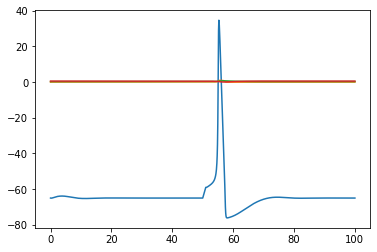

In [108]:
hh([0,100], [-65, 0, 0.3, 0.6], 2000, inp = [50, 51, 7])

#### From the result, we can clearly know that from 50 to 51, there is a spike raised by 7 microamps.

### 2.Test in 6.9 microamps, 1 second can't raise a spike.

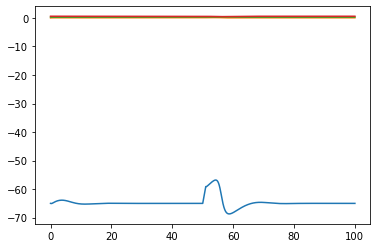

In [109]:
hh([0,100], [-65, 0, 0.3, 0.6], 2000, inp = [50, 51, 6.9])

#### From the result, we can clearly know that from 50 to 51, there isn't a spike raised by 6.9 microamps.

### 3.Test in 6.9 microamps, can 2 second raise a spike?

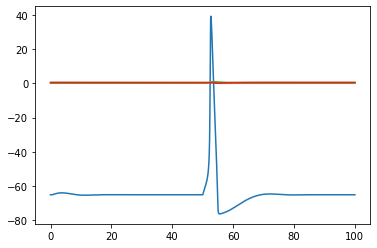

In [110]:
hh([0,100], [-65, 0, 0.3, 0.6], 2000, inp = [50, 52, 6.9])

#### We can see that although 6.9 microamps and 1 second can't raise a spike 2 seconds can raise a spike.

### 4. Test in 1 microamps, can 10 second raise a spike?

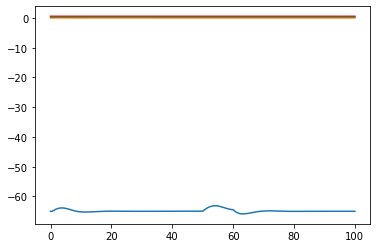

In [114]:
hh([0,100], [-65, 0, 0.3, 0.6], 2000, inp = [50, 60, 1])

#### Although we give 20 seconds, 1 microamp is too small to raise a spike.

### Conclusion: In this model, the current intensity is more important than stimulation time. A long time can't raise a spike, but a strong current can raise a spike in a short time.